# Google Data Analytics Capstone Project: Bellabeat Case Study

## Introduction
This is the capstone project to complete the Google Data Analytics Certificate. 
This is an opportunity to analyze publicly available fitness tracker data to gain insights into how consumers are using these products. Identifying any trends in this data will be key. This will help Bellabeat, a high-tech manufacturer of health-focused products for women, determine its marketing strategy in the future.


## Phase 1 - Ask

### 1.1. Business Task
Analyze smart device data to gain insight into how consumers are using their smart devices. These insights will then help guide the marketing strategy for the company. 

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### 1.2. Key Stakeholders
* **Urška Sršen:** Bellabeat’s co-founder and Chief Creative Officer
* **Sando Mur:** Mathematician and Bellabeat’s cofounder; a key member of the Bellabeat executive team
* **Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and reportinging data that helps guide Bellabeat’s marketing strategy.

### 1.3. Deliverables for this case study
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Suppo rting visualizations and key fi ndings
6. Your top high-level content recommendations based on your analysis

---

## Phase 2 - Prepare

### 2.1. The data
* The data for this case study comes from this public repository in [Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit).
* It consists of 29 CSV files with data between 12th March 2016 and 12th May 2016.
* The personal tracker data includes minute-level output for physical activity, heart rate, and sleep monitoring.

### 2.2. Limitations of the data
* The data consists of only 3 months in 2016. Although this can provide good insights, it will not allow for a proper analysis of long term usage of the smart devices. In addition to that, these users 
* The data comes from 30 users that volunteered to submit their data. This sample may not be representative of the whole population and in particular, of the female population that Bellabeat is interested in. Also, the data may not accurately representative the diversity in the population.

### 2.3. Is the data good and credible?

To analyse if the data is good and credible, we can evaluate if it using the ROCCC system (Reliable, Original, Comprehensive, Current, and Cited):

* Reliable: Not very reliable as stated in the limitations of the data
* Original: third party data, collected via Amazon Mechanical Turk
* Comprehensive: the data is not comprehensive enough as stated in the limitations of the data
* Current: the data was collected in 2016, meaning it is outdated and may not be representative of current trends
* Cited: Unknown, it is not stated if the collected data is from a credible source

The credibility of the data is insufficient, however, it contains enough information to provide some basic insights that can help answer our main task. A further study with better data is recommended to provide more reliable insights and verify our findings.

### 2.4. Data selection

For this case study, I'll focus my analysis on the following files:

- dailyActivity_merged.csv
- sleepDay_merged.csv


## Phase 3 - Process

I'll be using Python to perform cleaning, analysis, and visualisation of the data.


### 3.1 Import packages

In [523]:
# Import packages
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualisation
import datetime as dt # date time
import seaborn as sns # data visualisation

<br>

### 3.2 Read CSV files into dataframes

In [526]:
# Read csv files into dataframe
daily_activity_df = pd.read_csv("./datasets/dailyActivity_merged.csv")
daily_sleep_df = pd.read_csv("./datasets/sleepDay_merged.csv")

<br>

### 3.3 Data cleaning

In this step I'll be:
- Examining the data and familiarising with it
- Checking for nulls, missing values, or other errors
- Merging the data so it's easier to manipulate
- Other sanity checks to ensure the integrity and consistency of the dataset


In [529]:
# Preview first 10 rows of each dataframe
daily_activity_df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [530]:
# Preview first 10 rows of each dataframe
daily_sleep_df.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
5,1503960366,4/19/2016 12:00:00 AM,1,304,320
6,1503960366,4/20/2016 12:00:00 AM,1,360,377
7,1503960366,4/21/2016 12:00:00 AM,1,325,364
8,1503960366,4/23/2016 12:00:00 AM,1,361,384
9,1503960366,4/24/2016 12:00:00 AM,1,430,449


<br>

The columns **LoggedActivitiesDistance** and **SedentaryActiveDistance** are showing all their rows with values of 0.0. This could be that the 10 rows in view have those values correctly, but will need to be confirmed when exploring Min and Max values
<br></br>

In [532]:
# Check for basic metadata and correct data types for each column
daily_activity_df.info()
print()
daily_sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

<br>

All data types seem to be correct except for the Dates in each dataset, which are defined as **Object** and will need to be changed to **datetime64** to be able to do some manipulation.


In [534]:
# Rename both date fields to just Date to simplify the merging process
daily_activity_df.rename(columns={'ActivityDate':'Date'}, inplace=True)
daily_sleep_df.rename(columns={'SleepDay':'Date'}, inplace=True)

# Change the date columns to datetime type
daily_activity_df['Date'] = pd.to_datetime(daily_activity_df['Date'],format='%m/%d/%Y')
daily_sleep_df['Date'] = pd.to_datetime(daily_sleep_df['Date'],format='mixed')

In [535]:
# Check for missing or null values in dataframes
print("Percent of missing/null values in daily activity dataframe:")
for col in daily_activity_df.columns:
    percent_missing = daily_activity_df[col].isnull().sum() / len(daily_activity_df) * 100
    print(f"{col} - {percent_missing:.1f}%")

print()
print("Percent of missing/null values in daily sleep dataframe:")
for col in daily_sleep_df.columns:
    percent_missing = daily_sleep_df[col].isnull().sum() / len(daily_sleep_df) * 100
    print(f"{col} - {percent_missing:.1f}%")

Percent of missing/null values in daily activity dataframe:
Id - 0.0%
Date - 0.0%
TotalSteps - 0.0%
TotalDistance - 0.0%
TrackerDistance - 0.0%
LoggedActivitiesDistance - 0.0%
VeryActiveDistance - 0.0%
ModeratelyActiveDistance - 0.0%
LightActiveDistance - 0.0%
SedentaryActiveDistance - 0.0%
VeryActiveMinutes - 0.0%
FairlyActiveMinutes - 0.0%
LightlyActiveMinutes - 0.0%
SedentaryMinutes - 0.0%
Calories - 0.0%

Percent of missing/null values in daily sleep dataframe:
Id - 0.0%
Date - 0.0%
TotalSleepRecords - 0.0%
TotalMinutesAsleep - 0.0%
TotalTimeInBed - 0.0%


<br>

There are no missing values or null values in either dataframe, but now I will check for duplicate records.


In [537]:
# Check for duplicates in daily_activity_df
activity_duplicates = daily_activity_df[daily_activity_df.duplicated(subset=['Id', 'Date'], keep=False)]
print("Duplicates in daily_activity_df:")
print(activity_duplicates)

# Check for duplicates in daily_sleep_df
sleep_duplicates = daily_sleep_df[daily_sleep_df.duplicated(subset=['Id', 'Date'], keep=False)]
print("Duplicates in daily_sleep_df:")
print(sleep_duplicates)

Duplicates in daily_activity_df:
Empty DataFrame
Columns: [Id, Date, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []
Duplicates in daily_sleep_df:
             Id       Date  TotalSleepRecords  TotalMinutesAsleep  \
160  4388161847 2016-05-05                  1                 471   
161  4388161847 2016-05-05                  1                 471   
222  4702921684 2016-05-07                  1                 520   
223  4702921684 2016-05-07                  1                 520   
379  8378563200 2016-04-25                  1                 388   
380  8378563200 2016-04-25                  1                 388   

     TotalTimeInBed  
160             495  
161             495  
222             543  
223             543  
379             402  
380             402  


<br>

There are multiple duplicates in the daily sleep dataset. Before merging these need to be dropped.


In [539]:
# Drop duplicates in the daily sleep dataset
daily_sleep_df.drop_duplicates(subset=['Id', 'Date'], keep='first', inplace=True)

# Check the shape of the DataFrame after dropping duplicates
print(daily_sleep_df.shape)

(410, 5)


<br>

Getting some basic statistics to do some sanity checks on the numbers and make sure numbers are making sense (i.e. confirm that LoggedActivitiesDistance and SedentaryActiveDistance have other values besides 0.0.
<br>

In [541]:
# Get basic summary statistics
daily_activity_df.describe()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


In [542]:
# Get basic summary statistics 
daily_sleep_df.describe()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410,410.000000,410.000000,410.000000
mean,4.994963e+09,2016-04-26 11:38:55.609756160,1.119512,419.173171,458.482927
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.750000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,432.500000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060863e+09,NaN,0.346636,118.635918,127.455140


In [543]:
# Count how many users are recorded in each dataframe
uniqueID_activity = len(pd.unique(daily_activity_df['Id']))
print(f"The number of IDs in the daily activity DF is {uniqueID_activity}")

uniqueID_sleep = len(pd.unique(daily_sleep_df['Id']))
print(f"The number of IDs in the daily activity DF is {uniqueID_sleep}")

The number of IDs in the daily activity DF is 33
The number of IDs in the daily activity DF is 24


<br>

The two datasets contain observations for different number of users. The daily activity dataset contains 33 user IDs and the daily sleep dataset contains 24 user IDs. This may mean that some of these users are not using their device while they sleep so no data was recorded.

Despite this, the data can be merged and some users will not contain sleep data, which in itself is an interesting insight for those users.

In [545]:
# Merge datasets into one dataframe
daily_activity_sleep = pd.merge(daily_activity_df, daily_sleep_df, on=['Id','Date'], how='outer')

In [546]:
# Check the shape of the new DataFrame
print(daily_activity_sleep.shape)
print()

# Check for basic metadata and correct data types for each column
daily_activity_sleep.info()

(940, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActi

In [547]:
# Preview first 10 rows of the new dataframe
daily_activity_sleep.head(10)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,NaN,NaN,NaN
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,1.0,304.0,320.0
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,1.0,360.0,377.0
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,1.0,325.0,364.0


In [548]:
# Check for missing or null values in the new dataframe
print("Percent of missing/null values in daily activity dataframe:")
for col in daily_activity_sleep.columns:
    percent_missing = daily_activity_sleep[col].isnull().sum() / len(daily_activity_sleep) * 100
    print(f"{col} - {percent_missing:.1f}%")

Percent of missing/null values in daily activity dataframe:
Id - 0.0%
Date - 0.0%
TotalSteps - 0.0%
TotalDistance - 0.0%
TrackerDistance - 0.0%
LoggedActivitiesDistance - 0.0%
VeryActiveDistance - 0.0%
ModeratelyActiveDistance - 0.0%
LightActiveDistance - 0.0%
SedentaryActiveDistance - 0.0%
VeryActiveMinutes - 0.0%
FairlyActiveMinutes - 0.0%
LightlyActiveMinutes - 0.0%
SedentaryMinutes - 0.0%
Calories - 0.0%
TotalSleepRecords - 56.4%
TotalMinutesAsleep - 56.4%
TotalTimeInBed - 56.4%


<br>
56.4% of users have no sleep data recorded and the assumption is that these users are not using their device during sleep but are using it during other times of the day.

<br>

Although we already have the Date column, it's a good idea to also show what day of the week it was so we can extract more information for our analysis. To do so, I'll create a new column with the Day of the Week.


In [551]:
# Create new column "DayOfTheWeek" to represent day of the week 
daily_activity_sleep['DayOfTheWeek'] = daily_activity_sleep['Date'].dt.day_name()

# Preview first 5 rows to confirm
daily_activity_sleep['DayOfTheWeek'].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

<br>

Another metric that will be useful is the total amount of minutes that users were at least moderatively active (Very active + fairly active) and also the total amount of minutes that users were not sedentary.

In [553]:
# Create new column "TotalActiveMinutes" that adds up VeryActiveMinutes + FairlyActiveMinutes
daily_activity_sleep['TotalActiveMinutes'] = daily_activity_sleep['VeryActiveMinutes'] + daily_activity_sleep['FairlyActiveMinutes']

# Convert to Int64
daily_activity_sleep['TotalActiveMinutes'] = daily_activity_sleep['TotalActiveMinutes'].astype('Int64')

# Create new column "TotalMinutes" that adds up VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes
daily_activity_sleep['TotalMinutesMoving'] = daily_activity_sleep['VeryActiveMinutes'] + daily_activity_sleep['FairlyActiveMinutes'] + daily_activity_sleep['LightlyActiveMinutes']

# Convert to Int64
daily_activity_sleep['TotalMinutesMoving'] = daily_activity_sleep['TotalMinutesMoving'].astype('Int64')

# Preview first 5 rows to confirm
daily_activity_sleep['TotalActiveMinutes'].head(5)
daily_activity_sleep['TotalMinutesMoving'].head(5)

0    366
1    257
2    222
3    272
4    267
Name: TotalMinutesMoving, dtype: Int64

In [554]:
# Reorder columns to have the DayOfTheWeek column after the Date column and TotalActiveMinutes before SedentaryMinutes
# Create list with new column order
new_column_order = ['Id', 'Date', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',	'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'TotalActiveMinutes', 'LightlyActiveMinutes', 'TotalMinutesMoving', 'SedentaryMinutes', 'Calories', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']

# Apply new order to dataframe
daily_activity_sleep = daily_activity_sleep[new_column_order]

# Preview first 5 rows to confirm new order
daily_activity_sleep.head(5)

,Id,Date,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveMinutes,FairlyActiveMinutes,TotalActiveMinutes,LightlyActiveMinutes,TotalMinutesMoving,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,25,13,38,328,366,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,21,19,40,217,257,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,...,30,11,41,181,222,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,...,29,34,63,209,272,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,...,36,10,46,221,267,773,1863,2.0,340.0,367.0



# Phase 4/5 - Analyse & Share

In this phase I'll go deeper into the numbers and interpret what they are telling us with to how these devices are being used. Some of the thigns I'll focus on are:

- Central tendency metrics
- Days of the week when users log activities
- Steps, active minutes and sleep per day
- How the average user behaves in a day
- Activity vs Sleep

### 4.1. Summary Statistics 


From the next table we can extract some insights into the usage of these devices:

1. The median number of steps recorded by users was 7405 steps per day and 21 median active minutes per day (21 minutes of higher intensity activity). According to multiple public health organisations in the world, people should aim to do 10,000 steps per day, however, this recommendation has been changing lately and it's not so strict on the number of steps but more on how many minutes of moderate and intense activity is done per week. The World Health Organisation (WHO) recommends at least 150 minutes per week (around 21 minutes/day) of moderate activity or at least 75 minutes per week (around 10 minutes/day) of vigorous intensity activity.
   
2. At least 50% of the records have 1057 minutes (17 hours and 37 minutes) of sedentary activity per day, which is higher than what is recommended. Including sleep, adults should aim to spend under 16-17 hours of sedentary time.

3. Of the users who recorded sleep data, they spend on average 6 hours and 59 minutes (419 minutes) asleep, which is close to the usual recommendation of 8 hours (this number varies as we age).

I'll explore these findings further.


In [558]:
# Get basic summary statistics of the new dataframe
daily_activity_sleep.describe()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,TotalActiveMinutes,LightlyActiveMinutes,TotalMinutesMoving,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0,940.000000,940.0,940.000000,940.000000,410.000000,410.000000,410.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,34.729787,192.812766,227.542553,991.210638,2303.609574,1.119512,419.173171,458.482927
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,58.000000,61.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,0.0,127.000000,146.75,729.750000,1828.500000,1.000000,361.000000,403.750000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,21.0,199.000000,247.0,1057.500000,2134.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,57.0,264.000000,317.25,1229.500000,2793.250000,1.000000,490.000000,526.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,275.0,518.000000,552.0,1440.000000,4900.000000,3.000000,796.000000,961.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,43.456579,109.174700,121.776307,301.267437,718.166862,0.346636,118.635918,127.455140


### 4.2. Number of times users logged data during the week

We can see from this chart that users tend to log data more frequently during the middle of the week (Tuesday to Thursday), compared to the start and end of the week (Friday to Monday). This could be related to lifestyle, as people are usually more socially active during the weekend so it's likely that these users forgot or didn't want to track their activity as much during those days.


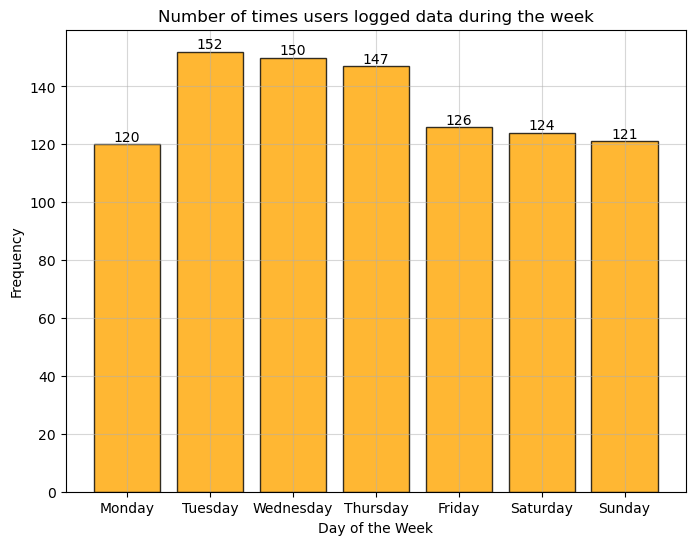

In [561]:
# Understand what days of the week users are logging data

day_of_week_counts = daily_activity_sleep['DayOfTheWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(day_of_week_counts.index, day_of_week_counts, alpha=0.8, color='orange', edgecolor='black')

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}', ha='center', va='bottom')


# Customise chart
plt.title('Number of times users logged data during the week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()

### 4.3. Total Steps Recorded per Day

Previously, we had seen that the mean and median of the Total Steps were around 7,500 steps per day, and the 75th percentile was around 10500 steps, implying that there are many outliers pushing up the mean. 

The following chart shows the distribution of these recordings. We can see that there's a large number of users recording between 0 and 3,000 steps a day, and between 9,000 and 12,000 steps a day. From this point forward the numbers of records decrease until we find a few outliers with over 27,000 steps per day.

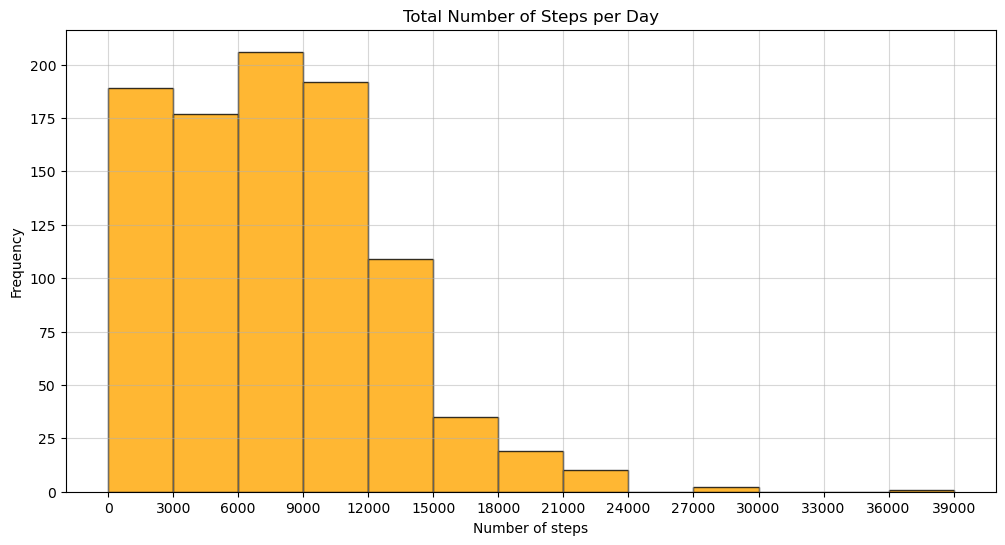

In [564]:
# Define bin width
bin_width = 3000
bins = range(0, daily_activity_sleep['TotalSteps'].max() + bin_width, bin_width)

# Create histogram
plt.figure(figsize=(12,6))
plt.hist(daily_activity_sleep['TotalSteps'],bins=bins, alpha=0.8, color='orange', edgecolor='black')

# Customise box plot
plt.title('Total Number of Steps per Day')
plt.ylabel('Frequency')
plt.xlabel('Number of steps')
plt.xticks(bins)
plt.grid(True, alpha=0.5)
plt.show()

### 4.4. Total Active Minutes per Day

The average total active minutes per day is around 34 and the median is 21. This indicates that there's a few number of recordings pushing up the mean and this is clearly seen in the histogram below, where a very large number of users recorded between 0 and 15 minutes of moderate or intense activity per day and the tail is extending to the right with some very high values.

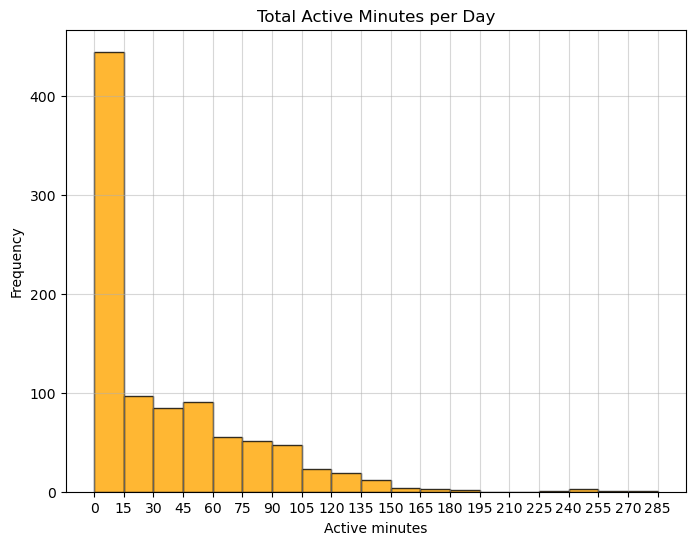

In [567]:
# Define bin width
bin_width = 15
bins = range(0, daily_activity_sleep['TotalActiveMinutes'].max() + bin_width, bin_width)

# Create histogram
plt.figure(figsize=(8,6))
plt.hist(daily_activity_sleep['TotalActiveMinutes'],bins=bins, alpha=0.8, color='orange', edgecolor='black')

# Customise box plot
plt.title('Total Active Minutes per Day')
plt.ylabel('Frequency')
plt.xlabel('Active minutes')
plt.xticks(bins)
plt.grid(True, alpha=0.5)
plt.show()

### 4.5. Total Sedentary Hours per Day

Users spent on average 16.5 hours (991.21 minutes) per day in sedentary positions, which indicates little activity or movement (assuming 7-8 hours of sleep). This is not recommended by any medical organisation as it can lead to several negative health outcomes, who recommend keeping sedentary time to less than 16-17 hours (including sleep). In the histogram below we can explore more the distribution and see that there's a large number of users with over 20 hours of no activity.

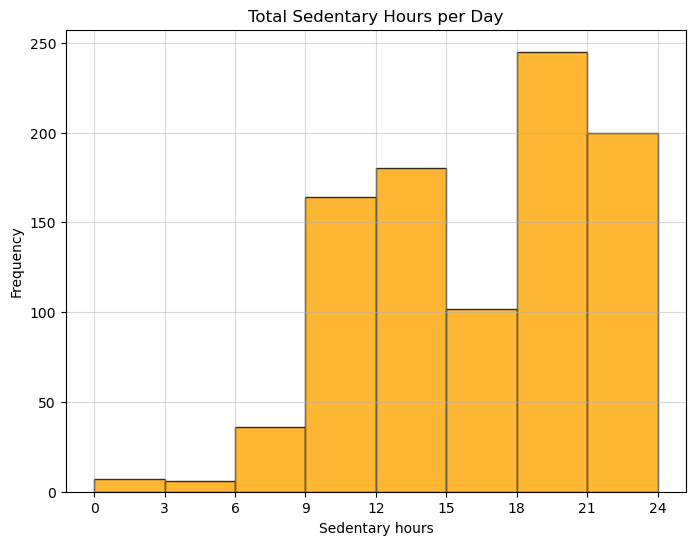

In [570]:
# Convert sedentary minutes to hours
hours_sedentary =  daily_activity_sleep['SedentaryMinutes'] / 60

# Define bin width
bin_width = 3
bins = range(0, int(hours_sedentary.max()) + bin_width, bin_width)

# Create histogram
plt.figure(figsize=(8,6))
plt.hist(hours_sedentary,bins=bins, alpha=0.8, color='orange', edgecolor='black')

# Customise box plot
plt.title('Total Sedentary Hours per Day')
plt.ylabel('Frequency')
plt.xlabel('Sedentary hours')
plt.grid(True,alpha=0.5)
plt.xticks(bins)
plt.show()

### 4.6. Average user activity per day

We can see from the following pie chart that the average user spends just over 80% of their day in sedentary positions, including sleeping, equating to 19.2 hours/day. Only 15.82% of the day (around 3.8 hours) are spent in light movement.

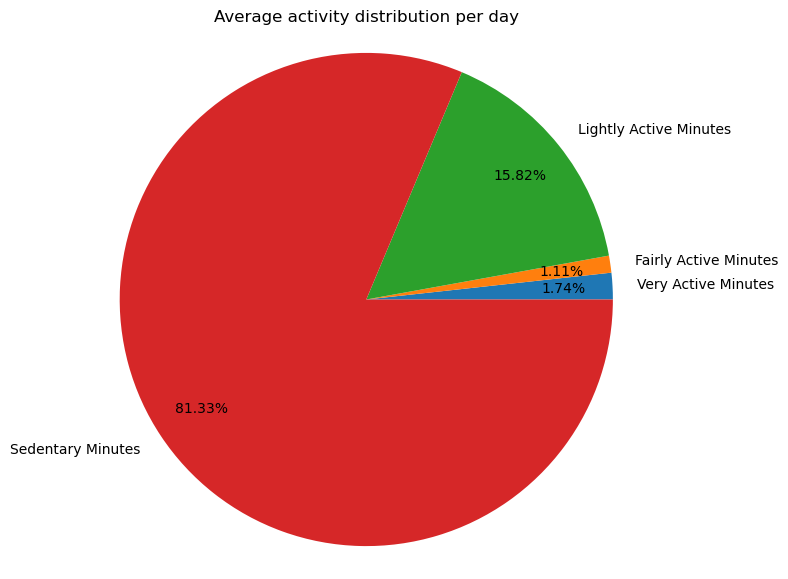

In [713]:
# Average minutes per category
activity_averages = daily_activity_sleep[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

# Create the Pie Chart
labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
sizes = activity_averages
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(7, 7))
plt.pie(activity_averages, labels=labels, autopct='%1.2f%%', pctdistance=0.8, startangle=360,  labeldistance=1.1)

# Customise bie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average activity distribution per day')
plt.show()

### 4.7. Minutes per activity per day

In this chart we can see that the distribution of activity per day does not change too much during the week, with only a slight increase in light activity on Fridays and Saturdays. 

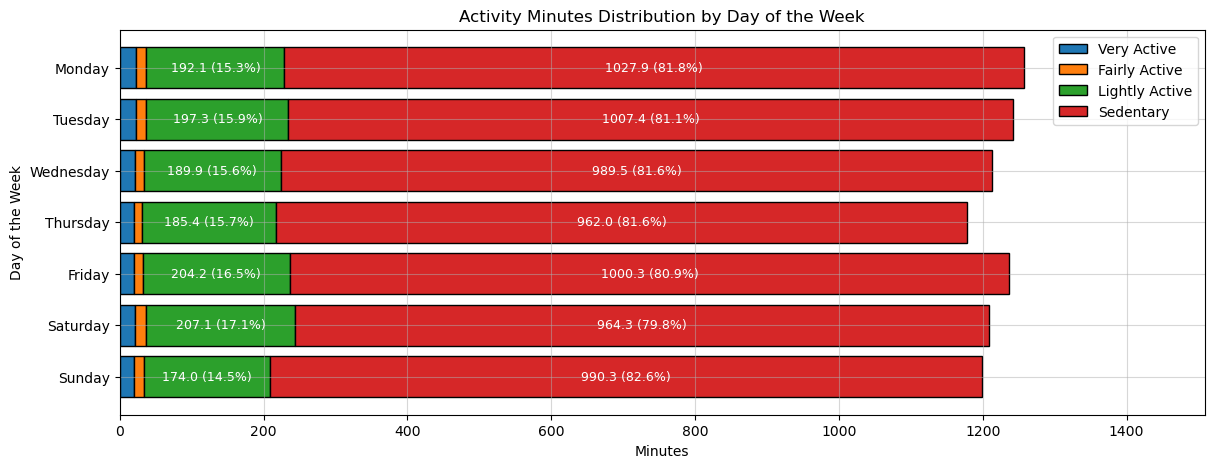

In [575]:
# Aggregate the data by day of the week, selecting only numeric columns
activity_categories = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
activity_by_day = daily_activity_sleep.groupby('DayOfTheWeek')[activity_categories].mean().reindex(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the stacked bar chart
plt.figure(figsize=(14, 5))

# Define positions for the bars
bar_height = 0.8
label_threshold = 50 # Threshold below which labels will not be shown

# Plot each activity type
p1 = plt.barh(activity_by_day.index, activity_by_day['VeryActiveMinutes'], label='Very Active',height=bar_height, edgecolor='black')
p2 = plt.barh(activity_by_day.index, activity_by_day['FairlyActiveMinutes'], left=activity_by_day['VeryActiveMinutes'], label='Fairly Active', height=bar_height, edgecolor='black')
p3 = plt.barh(activity_by_day.index, activity_by_day['LightlyActiveMinutes'], left=activity_by_day['VeryActiveMinutes'] + activity_by_day['FairlyActiveMinutes'], label='Lightly Active', height=bar_height, edgecolor='black')
p4 = plt.barh(activity_by_day.index, activity_by_day['SedentaryMinutes'], left=activity_by_day['VeryActiveMinutes'] + activity_by_day['FairlyActiveMinutes'] + activity_by_day['LightlyActiveMinutes'], label='Sedentary', height=bar_height, edgecolor='black')

# Add value labels for each segment with one decimal place
for i, day in enumerate(activity_by_day.index):
    start = 0
    total = activity_by_day.loc[day].sum()  # Calculate the total for the day
    for activity, color in zip(activity_categories, ['darkorange', 'orange', 'lightcoral', 'salmon']):
        value = activity_by_day.loc[day, activity]
        if value > 0:
            percentage = (value / total) * 100
            if value > label_threshold:
                plt.text(start + value / 2, i, f'{value:.1f} ({percentage:.1f}%)', ha='center', va='center', color='white', fontsize=9)
        start += value

# Customise chart
plt.title('Activity Minutes Distribution by Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Minutes')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.5)

# Invert the y-axis so that Monday is at the top
plt.gca().invert_yaxis()

# Extend x-axis limits to add more empty space on the right
max_minutes = activity_by_day.sum(axis=1).max()
plt.xlim(0, max_minutes * 1.2)  # Extend the x-axis by 20%

plt.show()

In [576]:
# Aggregate the data by day of the week, selecting only numeric columns
activity_categories = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
activity_by_day = daily_activity_sleep.groupby('DayOfTheWeek')[activity_categories].median().reindex(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

activity_by_day

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
DayOfTheWeek,,,,
Monday,8.0,8.0,201.5,1088.0
Tuesday,7.5,8.0,209.0,1063.0
Wednesday,5.0,8.0,191.0,1053.0
Thursday,3.0,6.0,190.0,957.0
Friday,1.5,5.0,205.0,1065.0
Saturday,3.0,4.0,223.0,1076.5
Sunday,0.0,1.0,185.0,1060.0


### 4.8. Activity vs Sleep

The following chart shows us a slight negative correlation between moderate/intense activity and sleep. The number of hours asleep tends to slowly decrease the more active people are.

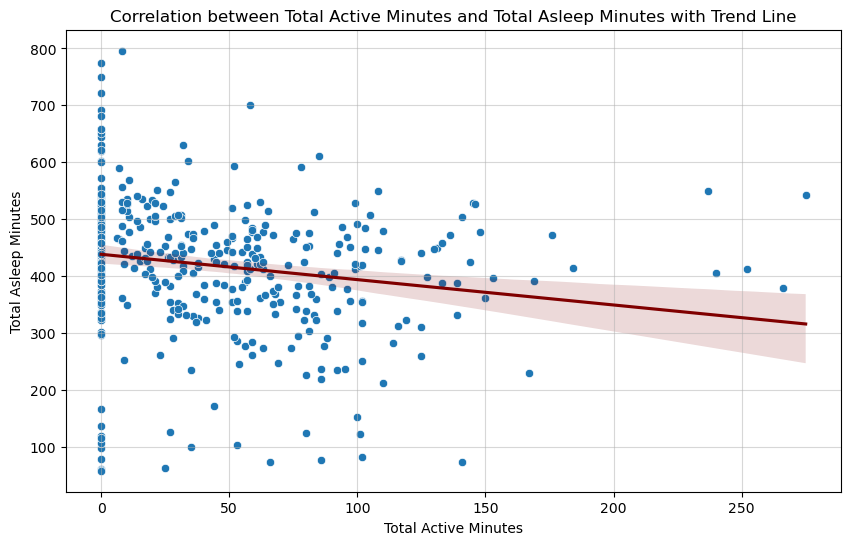

In [579]:
# Drop NaN from Total Active Minutes
daily_activity_sleep2 = daily_activity_sleep.dropna(subset=['TotalActiveMinutes','TotalMinutesAsleep'])

# Convert columns to float64 to avoid dtype issues
daily_activity_sleep2['TotalActiveMinutes'] = daily_activity_sleep2['TotalActiveMinutes'].astype('float64')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalActiveMinutes', y='TotalMinutesAsleep', data=daily_activity_sleep2, legend='full')

# Plot the regression line
sns.regplot(x='TotalActiveMinutes', y='TotalMinutesAsleep', data=daily_activity_sleep2, scatter=False, color='maroon')

# Customise chart
plt.title('Correlation between Total Active Minutes and Total Asleep Minutes with Trend Line')
plt.xlabel('Total Active Minutes')
plt.ylabel('Total Asleep Minutes')
plt.grid(True, alpha=0.5)
plt.show()

## Phase 6 - Act

### Recommendations
After analysing the findings above, here are some recommendations for Bellabeat:

- These users tend to log more data midweek compared to the weekend, Bellabeat can try to encourage users to use their device more during weekends by sending reminders and sharing articles about health benefits of doing consistent activity.
- A very large number of users recorded little to no activity during the day. This could be tackled by creating 'Move Alerts' to remind people to move every 30-60 minutes. Additionally, Bellabeat can try to engage more users by creating Challenges that push people to do more activities throughout the week.
- Another way to engage people can be by offering tangible benefits like cinema tickets or shop discounts when they reach certain milestones (i.e. X number of steps per day/week)
